In [1]:
# this notebook is just following this
# https://www.youtube.com/playlist?list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO
# and also the stuff linked in it, mostly the latter actually
# in between the tutorial stuff you have 'extras' where you mess about with the library on your own

In [2]:
# pip install tensorflow
# done

In [2]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

# this thing is for supressing output
# use 
with suppress_stdout():
    print("invisible output, woooo")
# for it to work
            
def maxIndex(l):
    max_index = -1
    max_val = - np.Infinity
    for i, n in enumerate(l):
        if max_val < n:
            max_val = n
            max_index = i
    return max_index
            
# IMPORTS GO HERE
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt 

In [4]:
# vid 1 / tutorial 1
# basic linear function, 1 layer 1 node
# https://www.youtube.com/watch?v=KNAWp2S3w94&list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO&index=1
# https://developers.google.com/codelabs/tensorflow-1-helloworld#0

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)
# the data is 3x + 1

with suppress_stdout():
    model.fit(xs, ys, epochs=1000)

print(model.predict([10.0]))

1/1 [==============================] - 0s 73ms/step
[[30.999966]]


In [5]:
# tutorial 2
# clothing recognition using an existing dataset
# https://developers.google.com/codelabs/tensorflow-2-computervision#0

def getItemName(n): # VERY USEFUL FUNCTION
    if not n in range(10):
        return "what"
    return {
        0: "T-shirt/top",
        1: "Trousers m8 gadseibdaqween",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot (big boot)"
    }[n]

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4998 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3753 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3375 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3125 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2961 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2806 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2692 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2568 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2495 - accuracy: 0.9057
Epoch 10/10
313/313 [==============================] - 0s 830us/step - loss: 0.356

[0.3566458523273468, 0.8748000264167786]

In [6]:
# tutorial 2 exploration exercises
# https://developers.google.com/codelabs/tensorflow-2-computervision#5

# Exercise 1
"""
classifications = model.predict(test_images)
print(classifications[0])
print(maxIndex(classifications[0]))
"""
# Exercise 2
"""
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
model.evaluate(test_images, test_labels)
"""
# Exercise 3
# ye okei, neat

# Exercise 4
# yeah no shit

# Exercise 5
"""
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
print("nooral netwrc")
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
model.evaluate(test_images, test_labels)
print("it actually is more accurate lol")
"""
# Exercise 6
"""
print("COPY PASTED CODE WOOOOOOOOOO")
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])
"""

'\nprint("COPY PASTED CODE WOOOOOOOOOO")\nmnist = tf.keras.datasets.fashion_mnist\n(training_images, training_labels), (test_images, test_labels) = mnist.load_data()\n#training_images=training_images/255.0\n#test_images=test_images/255.0\nmodel = tf.keras.models.Sequential([tf.keras.layers.Flatten(), \n                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), \n                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])\nmodel.compile(optimizer = tf.keras.optimizers.Adam(),\n              loss = \'sparse_categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.fit(training_images, training_labels, epochs=10)\nmodel.evaluate(test_images, test_labels)\nclassifications = model.predict(test_images)\nprint(classifications[0])\nprint(test_labels[0])\n'

In [7]:
# tutorial 2 callbacks
# https://developers.google.com/codelabs/tensorflow-2-computervision#6

_desired_accuracy = 0.85

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if _desired_accuracy < logs.get('accuracy'):
            print(f"\nReached {_desired_accuracy*100}% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4749 - accuracy: 0.8323
Epoch 2/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.3575 - accuracy: 0.8698
Reached 85.0% accuracy so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3575 - accuracy: 0.8698


In [9]:
"""
WISDOMS

Sequential defines a sequence of layers in the neural network.
Flatten takes a square and turns it into a one-dimensional vector.
Dense adds a layer of neurons.
Activation functions tell each layer of neurons what to do. There are lots of options, but use these for now:
Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
Softmax takes a set of values, and effectively picks the biggest one.
For example, if the output of the last layer looks like 
[0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 
then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0] kinda, but still differetiable

"""

'\nWISDOMS\n\nSequential defines a sequence of layers in the neural network.\nFlatten takes a square and turns it into a one-dimensional vector.\nDense adds a layer of neurons.\nActivation functions tell each layer of neurons what to do. There are lots of options, but use these for now:\nRelu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.\nSoftmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].\n\n'

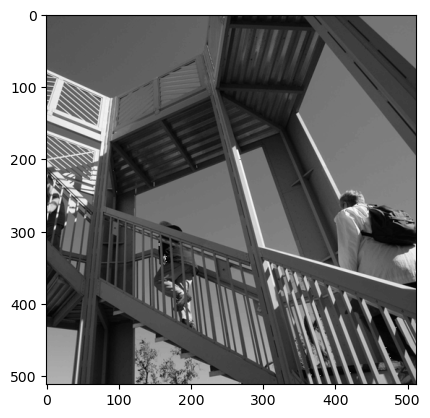

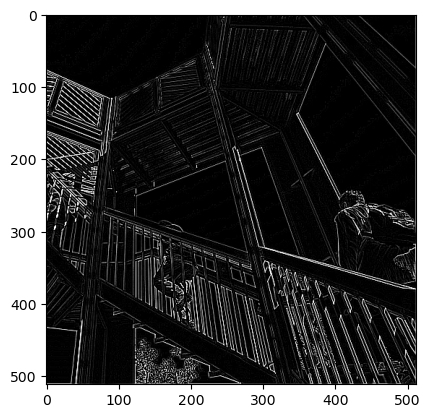

In [40]:
# tutorial 3 - CNNs
# https://developers.google.com/codelabs/tensorflow-3-convolutions#0

# faff about with an image for a bit I guess
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
ascent = scipy.misc.ascent()
ascent.shape
ascent.max()
plt.gray()
plt.imshow(ascent)
plt.show()
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
#filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]] 
# A couple more filters to try for fun!
#filter = [ [0, 0, 0], [-1, 0, 1], [0, 0, 0]]
#filter = [ [-1, -5, -1], [0, 0, 0], [1, 5, 1]]
filter = [ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
#filter = [ [-1, 0, 1], [-5, 0, 5], [-1, 0, 1]]
#filter = [ [-1, 1, -1], [1, 0, 1], [-1, 1, -1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
s = 0
for y in filter:
    for x in y:
        s += x
if s != 0:
    weight  = 1.0/s
else:
    weight  = 1.0

for x in range(1,size_x-1):
      for y in range(1,size_y-1):
        output_pixel = 0.0
        output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
        output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
        output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
        output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
        output_pixel = output_pixel + (i[x, y] * filter[1][1])
        output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
        output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
        output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
        output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
        output_pixel = output_pixel * weight
        if(output_pixel<0):
            output_pixel=0
        if(output_pixel>255):
            output_pixel=255
        i_transformed[x, y] = output_pixel

# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()  

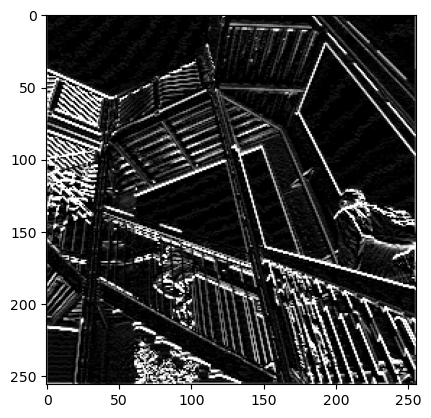

In [38]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
      for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        pixels.sort(reverse=True)
        newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

In [ ]:
# https://developers.google.com/codelabs/tensorflow-4-cnns#0
# this one now

In [41]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4862 - accuracy: 0.8285
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3642 - accuracy: 0.8672
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3275 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3024 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2864 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.8998
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2575 - accuracy: 0.9035
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9082
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2371 - accuracy: 0.9111
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3377 

In [1]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
#test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=3)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.11.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)         

In [3]:
# now's the rest of the tutorial where that first bit of code actually gets explained

import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0
# --------------------------------------------------------------------------------
# next page
# --------------------------------------------------------------------------------
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])
# --------------------------------------------------------------------------------
# next page
# --------------------------------------------------------------------------------
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4461 - accuracy: 0.8367
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2968 - accuracy: 0.8910
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2498 - accuracy: 0.9070
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2191 - accuracy: 0.9180
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2571 - accuracy: 0.9085
Test loss: 0.2571067810058594, Test accuracy: 90.85000157356262


1/1 [==============================] - 0s 28ms/step


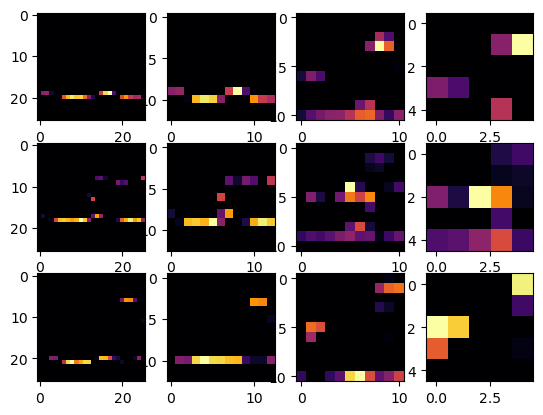

In [4]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [1]:
# --------------------------------------------------------------------------------
# Exercises WOOOOOOOOOO
# https://developers.google.com/codelabs/tensorflow-4-cnns#7
# --------------------------------------------------------------------------------
import tensorflow as tf
import time
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

# this thing is for supressing output
# use 
with suppress_stdout():
    print("invisible output, woooo")
# for it to work
            
def maxIndex(l):
    max_index = -1
    max_val = - np.Infinity
    for i, n in enumerate(l):
        if max_val < n:
            max_val = n
            max_index = i
    return max_index
            
# IMPORTS GO HERE
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt 

2.11.0


In [2]:
# Exercise 1
convnum = [16, 32, 64]
IPOKS = 5
for convy in convnum:
    t1 = time.time()
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(convy, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(convy, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    with suppress_stdout(): # SILENCE
        model.fit(training_images, training_labels, epochs=IPOKS)
    t2 = time.time()
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    t3 = time.time()
    print(f"For convy = {convy} we get:")
    print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy*100}")
    print(f"Training took {t2-t1} and evaling took {t3-t2}");

313/313 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.8961
For convy = 16 we get:
Test loss: 0.289237380027771, Test accuracy: 89.60999846458435
Training took 51.229453802108765 and evaling took 0.8501894474029541
313/313 [==============================] - 1s 3ms/step - loss: 0.2627 - accuracy: 0.9042
For convy = 32 we get:
Test loss: 0.2626526653766632, Test accuracy: 90.420001745224
Training took 73.72248268127441 and evaling took 0.9772188663482666
313/313 [==============================] - 1s 4ms/step - loss: 0.2750 - accuracy: 0.9037
For convy = 64 we get:
Test loss: 0.2749588191509247, Test accuracy: 90.36999940872192
Training took 130.52818179130554 and evaling took 1.4213173389434814


In [3]:
# Exercise 2
convnum = [16, 32, 64]
IPOKS = 5
for convy in convnum:
    t1 = time.time()
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(convy, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    with suppress_stdout(): # SILENCE
        model.fit(training_images, training_labels, epochs=IPOKS)
    t2 = time.time()
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    t3 = time.time()
    print(f"For convy = {convy} we get:")
    print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy*100}")
    print(f"Training took {t2-t1} and evaling took {t3-t2}");

313/313 [==============================] - 1s 2ms/step - loss: 0.2962 - accuracy: 0.8912
For convy = 16 we get:
Test loss: 0.2962493598461151, Test accuracy: 89.12000060081482
Training took 33.601513147354126 and evaling took 0.6171376705169678
313/313 [==============================] - 1s 2ms/step - loss: 0.2885 - accuracy: 0.8942
For convy = 32 we get:
Test loss: 0.2884962558746338, Test accuracy: 89.42000269889832
Training took 48.08074927330017 and evaling took 0.7741732597351074
313/313 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.8977
For convy = 64 we get:
Test loss: 0.28270581364631653, Test accuracy: 89.77000117301941
Training took 90.40121078491211 and evaling took 1.0682392120361328


In [4]:
# Exercise 3
convnum = [16, 32, 64]
IPOKS = 5
for convy in convnum:
    t1 = time.time()
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(convy, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(convy, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(convy, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    with suppress_stdout(): # SILENCE
        model.fit(training_images, training_labels, epochs=IPOKS)
    t2 = time.time()
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    t3 = time.time()
    print(f"For convy = {convy} we get:")
    print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy*100}")
    print(f"Training took {t2-t1} and evaling took {t3-t2}");

313/313 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8486
For convy = 16 we get:
Test loss: 0.4168691337108612, Test accuracy: 84.85999703407288
Training took 51.45650386810303 and evaling took 0.8111827373504639
313/313 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8598
For convy = 32 we get:
Test loss: 0.3935770094394684, Test accuracy: 85.97999811172485
Training took 73.01832389831543 and evaling took 0.9652154445648193
313/313 [==============================] - 1s 4ms/step - loss: 0.3131 - accuracy: 0.8872
For convy = 64 we get:
Test loss: 0.31309765577316284, Test accuracy: 88.71999979019165
Training took 128.64676189422607 and evaling took 1.3993124961853027


In [5]:
# Exercise 4
convnum = [16, 32, 64]
IPOKS = 5
for convy in convnum:
    t1 = time.time()
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(convy, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    with suppress_stdout(): # SILENCE
        model.fit(training_images, training_labels, epochs=IPOKS)
    t2 = time.time()
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    t3 = time.time()
    print(f"For convy = {convy} we get:")
    print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy*100}")
    print(f"Training took {t2-t1} and evaling took {t3-t2}");

313/313 [==============================] - 1s 2ms/step - loss: 0.3180 - accuracy: 0.8959
For convy = 16 we get:
Test loss: 0.3179720342159271, Test accuracy: 89.5900011062622
Training took 123.41747260093689 and evaling took 0.7544171810150146
313/313 [==============================] - 2s 4ms/step - loss: 0.3104 - accuracy: 0.9052
For convy = 32 we get:
Test loss: 0.31042322516441345, Test accuracy: 90.52000045776367
Training took 211.54684734344482 and evaling took 1.5933568477630615
313/313 [==============================] - 2s 6ms/step - loss: 0.3252 - accuracy: 0.9000
For convy = 64 we get:
Test loss: 0.32520103454589844, Test accuracy: 89.99999761581421
Training took 446.3737952709198 and evaling took 1.864417314529419


In [ ]:
"""
WISDOMS OF THE EXCERSIZE
more is not neccarily better
uhhhh
yeah
"""

In [ ]:
# next tutorial, we doing this now
# https://developers.google.com/codelabs/tensorflow-5-compleximages#0